Queremos saber qué productos de la familia Coca Cola son los más vendidos, cuánto capital se ha generado y qué productos son los que menos se venden. Para ello, vamos a utilizar la base de datos de ventas de Coca Cola.

In [21]:
#Se importan las librerias
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [42]:
#Inicia sesión de spark
spark = SparkSession.builder.appName('AnalisisCoca').getOrCreate()

In [3]:
#Se crea el df
df = spark.read.csv('hdfs://namenode:8020/user/hadoop/hist_coca.csv', header=True, inferSchema=True)

In [5]:
#Se muestran los primeros 10 registros
df.show(10)

+---------+----------+--------------------+--------+---------------+-----+--------------+
|ID_Compra|     Fecha|            Producto|Cantidad|Precio_Unitario|Total|        Tienda|
+---------+----------+--------------------+--------+---------------+-----+--------------+
|        1|2024-08-02|  Coca-Cola Original|       5|            1.2|  6.0|          OXXO|
|        2|2024-09-11|  Coca-Cola Vainilla|       4|            1.3|  5.2|          OXXO|
|        3|2024-12-29|    Coca-Cola Cherry|       1|            1.3|  1.3|Bodega Aurrera|
|        4|2024-04-14|    Coca-Cola Energy|       7|            1.5| 10.5|          OXXO|
|        5|2024-05-07|    Coca-Cola Energy|       6|            1.5|  9.0|          OXXO|
|        6|2024-05-29|Coca-Cola Sin Azúcar|       8|            1.1|  8.8|      7-Eleven|
|        7|2024-04-26|  Coca-Cola Vainilla|       6|            1.3|  7.8|Bodega Aurrera|
|        8|2024-09-05|     Coca-Cola Light|       1|            1.1|  1.1|          OXXO|
|        9

In [6]:
#Se imprime el schema para entender los tipos de variables
df.printSchema()

root
 |-- ID_Compra: integer (nullable = true)
 |-- Fecha: date (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Cantidad: integer (nullable = true)
 |-- Precio_Unitario: double (nullable = true)
 |-- Total: double (nullable = true)
 |-- Tienda: string (nullable = true)



In [7]:
#Se consultan las tiendas registradas en el df
df.select('Tienda').distinct().show()

+--------------+
|        Tienda|
+--------------+
|        Costco|
|       Walmart|
|      7-Eleven|
|       Soriana|
|          OXXO|
|Bodega Aurrera|
+--------------+



In [29]:
#Se consultan los productos registrados en el df
df.select('Producto').distinct().show()

+--------------------+
|            Producto|
+--------------------+
|Coca-Cola Sin Azúcar|
|  Coca-Cola Vainilla|
|     Coca-Cola Light|
|    Coca-Cola Cherry|
|  Coca-Cola Original|
|    Coca-Cola Energy|
+--------------------+



In [37]:
#Se crea un df agrupado por los productos e indique el número de unidades vendidas y los ingresos de cada uno
#Se convierte a pandas para facilitar crear las gráficas
ventasProducto = df.groupBy('Producto').agg(sum('Cantidad').alias('Unidades Totales'), round(sum('Total'),2).alias('Ingresos Totales')).orderBy(desc('Unidades Totales')).toPandas()
ventasProducto

,Producto,Unidades Totales,Ingresos Totales
0,Coca-Cola Original,208,249.6
1,Coca-Cola Sin Azúcar,198,217.8
2,Coca-Cola Cherry,195,253.5
3,Coca-Cola Vainilla,167,217.1
4,Coca-Cola Energy,167,250.5
5,Coca-Cola Light,161,177.1


/tmp/ipykernel_19925/2726590301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Producto', y='Unidades Totales', data = ventasProducto, palette='magma')


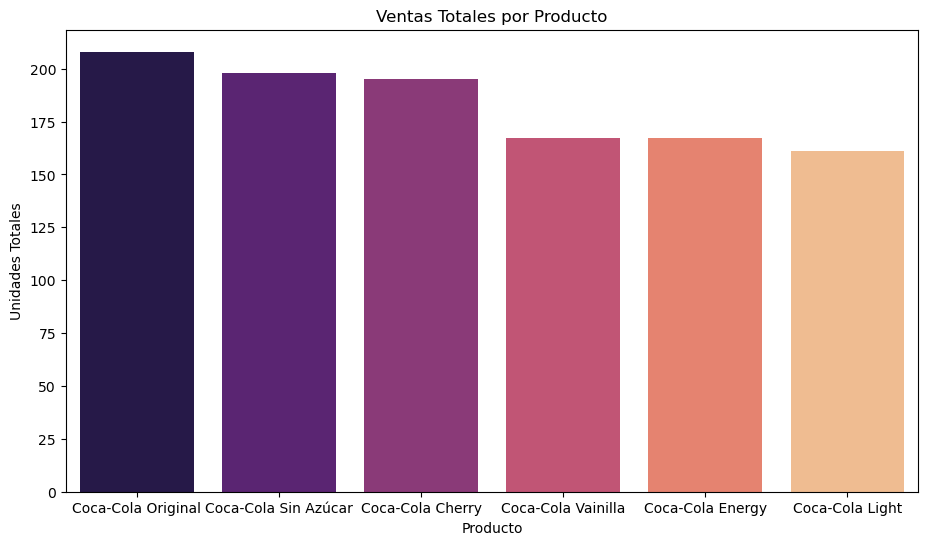

In [31]:
#Se crea gráfica de barra para visualizar los productos más vendidos por volúmen
plt.figure(figsize=(11,6))
sns.barplot(x='Producto', y='Unidades Totales', data = ventasProducto, palette='magma')
plt.title('Ventas Totales por Producto')
plt.show()

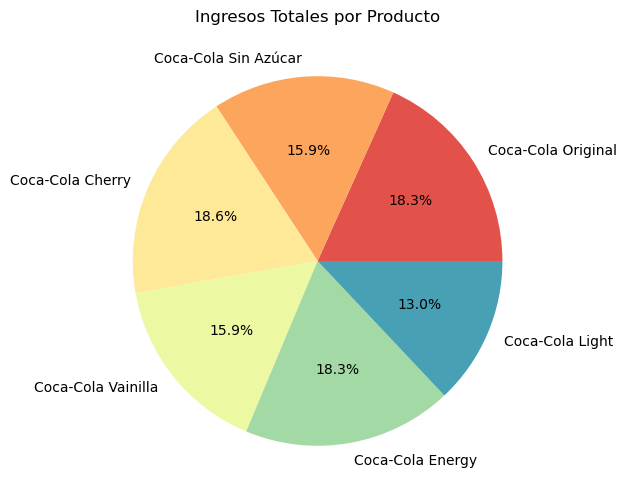

In [34]:
#Se crea gráfica de pay para saber qué productos han generado más ingresos
plt.figure(figsize=(11,6))
plt.pie(ventasProducto['Ingresos Totales'], labels=ventasProducto['Producto'], autopct='%1.1f%%', colors = sns.color_palette('Spectral'))
plt.title('Ingresos Totales por Producto')
plt.show()

In [36]:
#Se crea un df agrupado por las tiendas e indique el número de unidades vendidas y los ingresos de cada uno
#Se convierte a pandas para facilitar crear las gráficas
ventasTienda = df.groupBy('Tienda').agg(sum('Cantidad').alias('Unidades Totales'), round(sum('Total'),2).alias('Ingresos Totales')).orderBy(desc('Unidades Totales')).toPandas()
ventasTienda

,Tienda,Unidades Totales,Ingresos Totales
0,Bodega Aurrera,254,317.2
1,OXXO,195,238.7
2,7-Eleven,180,231.3
3,Walmart,162,202.7
4,Soriana,156,189.0
5,Costco,149,186.7


/tmp/ipykernel_19925/3678911880.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades Totales', y='Tienda', data = ventasTienda, palette='icefire')


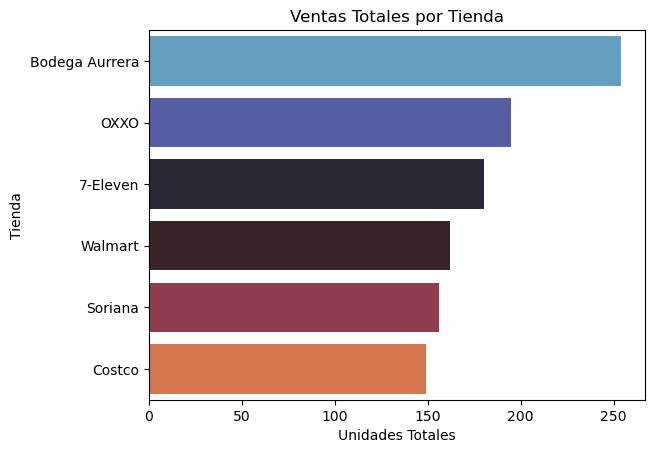

In [39]:
#Se crea gráfica para visualizar las tiendas con mayor venta
sns.barplot(x='Unidades Totales', y='Tienda', data = ventasTienda, palette='icefire')
plt.title('Ventas Totales por Tienda')
plt.show()

/tmp/ipykernel_19925/3273906768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingresos Totales', data = ventasTienda, palette='mako')


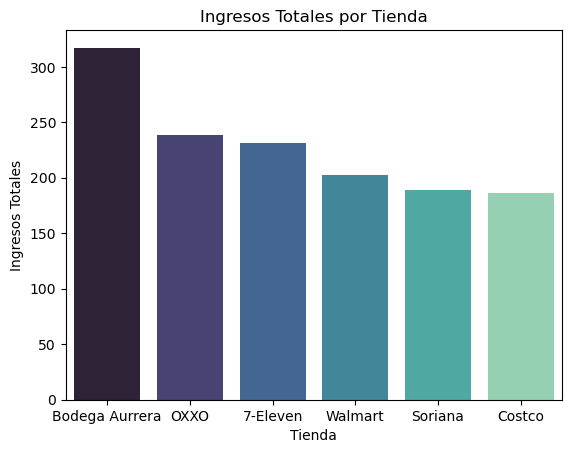

In [41]:
#Se crea gráfica para saber qué tienda ha generado más ingresos
sns.barplot(x='Tienda', y='Ingresos Totales', data = ventasTienda, palette='mako')
plt.title('Ingresos Totales por Tienda')
plt.show()

Los productos más populares son la Coca Cola Original, Sin Azucar, y Cherry. Y los productos que han generado más ingresos son la Cherry, Energy, y Original. Y se identificó que Bodega Aurrera es la tienda que ha registrado más ventas, y por tanto, mayor capital. También se puede notar que Oxxo y 7-Eleven estan casi empatados por el segundo lugar, lo que significa que existe un fuerte mercado en las tiendas de conveniencia.

Por lo que se recomienda aumentar la distribución de Coca Cola Cherry en Bodega Aurrera. Lanzar promociones en Oxxo y 7-Eleven para la Coca Cola Sin Azúcar.
Debido a la baja venta de Coca Cola Light, se recomienda disminuir la producción con el objetivo de disminuir gastos operativos.